In [78]:
import numpy as np
import pandas as pd
import missingno as msno
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.stats import chi2_contingency


In [79]:
df=pd.read_csv('Telco_Customer_Churn_Dataset.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [80]:
df.shape

(7043, 21)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Empty strings in 'customerID': 0
Empty strings in 'gender': 0
Empty strings in 'Partner': 0
Empty strings in 'Dependents': 0
Empty strings in 'PhoneService': 0
Empty strings in 'MultipleLines': 0
Empty strings in 'InternetService': 0
Empty strings in 'OnlineSecurity': 0
Empty strings in 'OnlineBackup': 0
Empty strings in 'DeviceProtection': 0
Empty strings in 'TechSupport': 0
Empty strings in 'StreamingTV': 0
Empty strings in 'StreamingMovies': 0
Empty strings in 'Contract': 0
Empty strings in 'PaperlessBilling': 0
Empt

<Axes: >

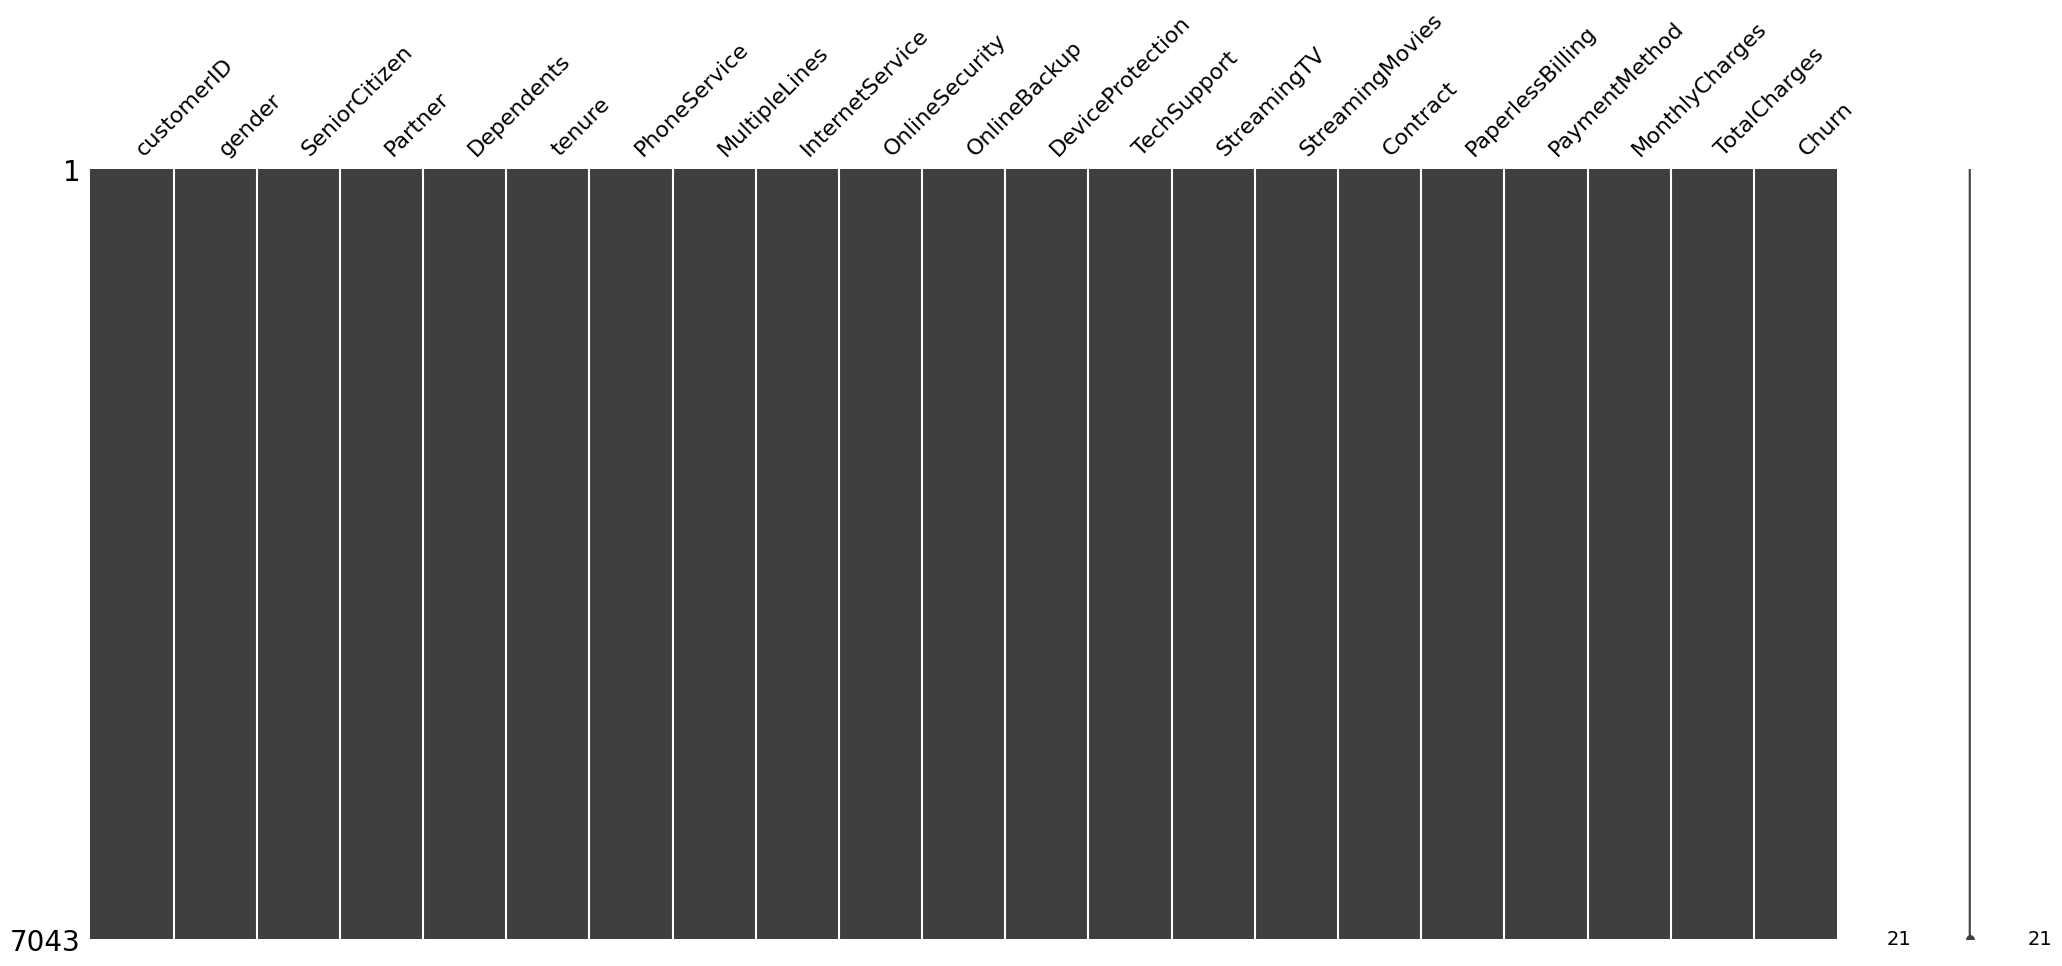

In [81]:

null_counts = df.isnull().sum()
print(null_counts)


for col in df.select_dtypes(include=['object']):
  empty_string_counts = (df[col] == '').sum()
  print(f"Empty strings in '{col}': {empty_string_counts}")



msno.matrix(df)

In [82]:

columns_to_drop = ['MultipleLines', 'DeviceProtection']
df = df.drop(columns=columns_to_drop, errors='ignore')


print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


In [83]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Fiber optic,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Fiber optic,No,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,DSL,Yes,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Fiber optic,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,DSL,Yes,Yes,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [84]:

for col in df.columns:
    print(f"Attributes for column '{col}':")
    print(f"  Data type: {df[col].dtype}")
    print(f"  Number of unique values: {df[col].nunique()}")
    print(f"  Unique values: {df[col].unique()}") 
    print(f"  Number of missing values: {df[col].isnull().sum()}")
    print("-" * 20)

Attributes for column 'customerID':
  Data type: object
  Number of unique values: 7043
  Unique values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
  Number of missing values: 0
--------------------
Attributes for column 'gender':
  Data type: object
  Number of unique values: 2
  Unique values: ['Female' 'Male']
  Number of missing values: 0
--------------------
Attributes for column 'SeniorCitizen':
  Data type: int64
  Number of unique values: 2
  Unique values: [0 1]
  Number of missing values: 0
--------------------
Attributes for column 'Partner':
  Data type: object
  Number of unique values: 2
  Unique values: ['Yes' 'No']
  Number of missing values: 0
--------------------
Attributes for column 'Dependents':
  Data type: object
  Number of unique values: 2
  Unique values: ['No' 'Yes']
  Number of missing values: 0
--------------------
Attributes for column 'tenure':
  Data type: int64
  Number of unique values: 73
  Unique values: [ 1 

In [85]:
columns_to_encode = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']


encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  


encoded_data = encoder.fit_transform(df[columns_to_encode])


feature_names = encoder.get_feature_names_out(columns_to_encode)



encoded_df = pd.DataFrame(encoded_data, columns=feature_names)


df_encoded = pd.concat([df.drop(columns=columns_to_encode), encoded_df], axis=1)

print(df_encoded.head())

   customerID  SeniorCitizen  tenure InternetService OnlineSecurity  \
0  7590-VHVEG              0       1             DSL             No   
1  5575-GNVDE              0      34             DSL            Yes   
2  3668-QPYBK              0       2             DSL            Yes   
3  7795-CFOCW              0      45             DSL            Yes   
4  9237-HQITU              0       2     Fiber optic             No   

  OnlineBackup TechSupport StreamingTV StreamingMovies        Contract  ...  \
0          Yes          No          No              No  Month-to-month  ...   
1           No          No          No              No        One year  ...   
2          Yes          No          No              No  Month-to-month  ...   
3           No         Yes          No              No        One year  ...   
4           No          No          No              No  Month-to-month  ...   

  gender_Female  gender_Male Partner_No Partner_Yes  Dependents_No  \
0           1.0          0.0

In [86]:

columns_to_drop = ['gender_Female', 'Partner_No', 'Dependents_Yes','PhoneService_No', 'PaperlessBilling_No']

df_encoded = df_encoded.drop(columns=columns_to_drop, errors='ignore')


print(df_encoded.info())
df_encoded.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customerID            7043 non-null   object 
 1   SeniorCitizen         7043 non-null   int64  
 2   tenure                7043 non-null   int64  
 3   InternetService       7043 non-null   object 
 4   OnlineSecurity        7043 non-null   object 
 5   OnlineBackup          7043 non-null   object 
 6   TechSupport           7043 non-null   object 
 7   StreamingTV           7043 non-null   object 
 8   StreamingMovies       7043 non-null   object 
 9   Contract              7043 non-null   object 
 10  PaymentMethod         7043 non-null   object 
 11  MonthlyCharges        7043 non-null   float64
 12  TotalCharges          7043 non-null   object 
 13  Churn                 7043 non-null   object 
 14  gender_Male           7043 non-null   float64
 15  Partner_Yes          

None


,customerID,SeniorCitizen,tenure,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_No,PhoneService_Yes,PaperlessBilling_Yes
0,7590-VHVEG,0,1,DSL,No,Yes,No,No,No,Month-to-month,Electronic check,29.85,29.85,No,0.0,1.0,1.0,0.0,1.0
1,5575-GNVDE,0,34,DSL,Yes,No,No,No,No,One year,Mailed check,56.95,1889.5,No,1.0,0.0,1.0,1.0,0.0
2,3668-QPYBK,0,2,DSL,Yes,Yes,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes,1.0,0.0,1.0,1.0,1.0
3,7795-CFOCW,0,45,DSL,Yes,No,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,No,1.0,0.0,1.0,0.0,0.0
4,9237-HQITU,0,2,Fiber optic,No,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes,0.0,0.0,1.0,1.0,1.0
5,9305-CDSKC,0,8,Fiber optic,No,No,No,Yes,Yes,Month-to-month,Electronic check,99.65,820.5,Yes,0.0,0.0,1.0,1.0,1.0
6,1452-KIOVK,0,22,Fiber optic,No,Yes,No,Yes,No,Month-to-month,Credit card (automatic),89.10,1949.4,No,1.0,0.0,0.0,1.0,1.0
7,6713-OKOMC,0,10,DSL,Yes,No,No,No,No,Month-to-month,Mailed check,29.75,301.9,No,0.0,0.0,1.0,0.0,0.0
8,7892-POOKP,0,28,Fiber optic,No,No,Yes,Yes,Yes,Month-to-month,Electronic check,104.80,3046.05,Yes,0.0,1.0,1.0,1.0,1.0
9,6388-TABGU,0,62,DSL,Yes,Yes,No,No,No,One year,Bank transfer (automatic),56.15,3487.95,No,1.0,0.0,0.0,1.0,0.0


In [87]:
df_encoded.head(10)

,customerID,SeniorCitizen,tenure,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_No,PhoneService_Yes,PaperlessBilling_Yes
0,7590-VHVEG,0,1,DSL,No,Yes,No,No,No,Month-to-month,Electronic check,29.85,29.85,No,0.0,1.0,1.0,0.0,1.0
1,5575-GNVDE,0,34,DSL,Yes,No,No,No,No,One year,Mailed check,56.95,1889.5,No,1.0,0.0,1.0,1.0,0.0
2,3668-QPYBK,0,2,DSL,Yes,Yes,No,No,No,Month-to-month,Mailed check,53.85,108.15,Yes,1.0,0.0,1.0,1.0,1.0
3,7795-CFOCW,0,45,DSL,Yes,No,Yes,No,No,One year,Bank transfer (automatic),42.30,1840.75,No,1.0,0.0,1.0,0.0,0.0
4,9237-HQITU,0,2,Fiber optic,No,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes,0.0,0.0,1.0,1.0,1.0
5,9305-CDSKC,0,8,Fiber optic,No,No,No,Yes,Yes,Month-to-month,Electronic check,99.65,820.5,Yes,0.0,0.0,1.0,1.0,1.0
6,1452-KIOVK,0,22,Fiber optic,No,Yes,No,Yes,No,Month-to-month,Credit card (automatic),89.10,1949.4,No,1.0,0.0,0.0,1.0,1.0
7,6713-OKOMC,0,10,DSL,Yes,No,No,No,No,Month-to-month,Mailed check,29.75,301.9,No,0.0,0.0,1.0,0.0,0.0
8,7892-POOKP,0,28,Fiber optic,No,No,Yes,Yes,Yes,Month-to-month,Electronic check,104.80,3046.05,Yes,0.0,1.0,1.0,1.0,1.0
9,6388-TABGU,0,62,DSL,Yes,Yes,No,No,No,One year,Bank transfer (automatic),56.15,3487.95,No,1.0,0.0,0.0,1.0,0.0


In [88]:
X = df_encoded.drop('Churn', axis=1) 
y = df_encoded['Churn']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5634, 18)
X_test shape: (1409, 18)
y_train shape: (5634,)
y_test shape: (1409,)


# EDA


In [89]:

total_customers = len(df_encoded)
churned_customers = df_encoded['Churn'].value_counts()['Yes']
churn_rate = (churned_customers / total_customers) * 100

print(f"Overall Churn Rate: {churn_rate:.2f}%")

Overall Churn Rate: 26.54%


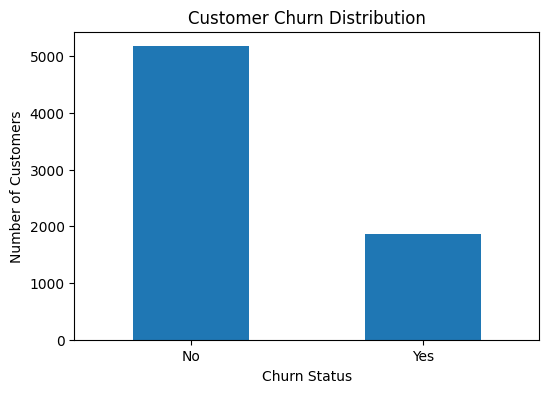

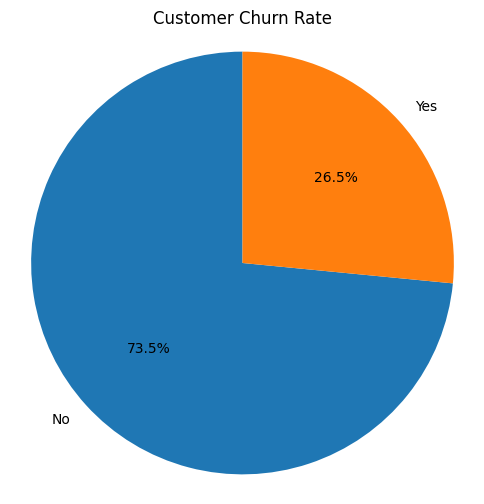

In [90]:

churn_counts = df_encoded['Churn'].value_counts()


plt.figure(figsize=(6, 4))
churn_counts.plot(kind='bar')
plt.title('Customer Churn Distribution')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0) 
plt.show()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Churn Rate')
plt.axis('equal')  
plt.show()

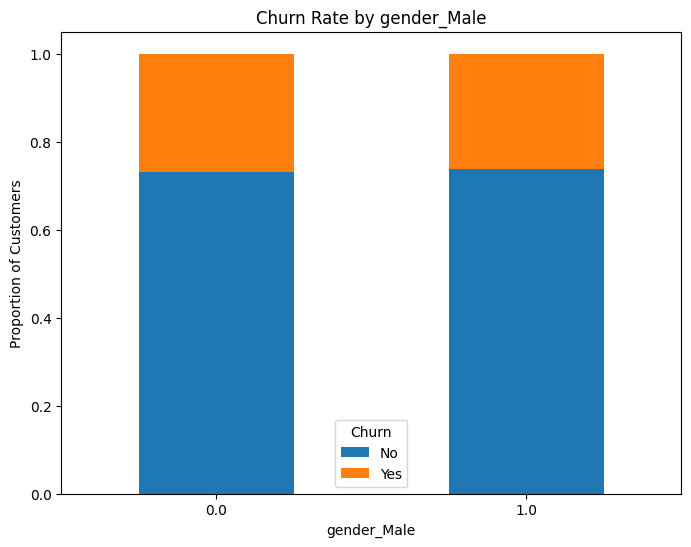

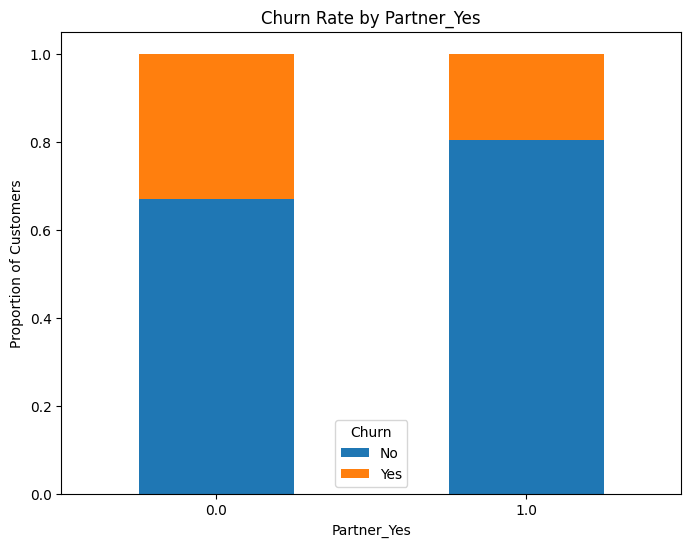

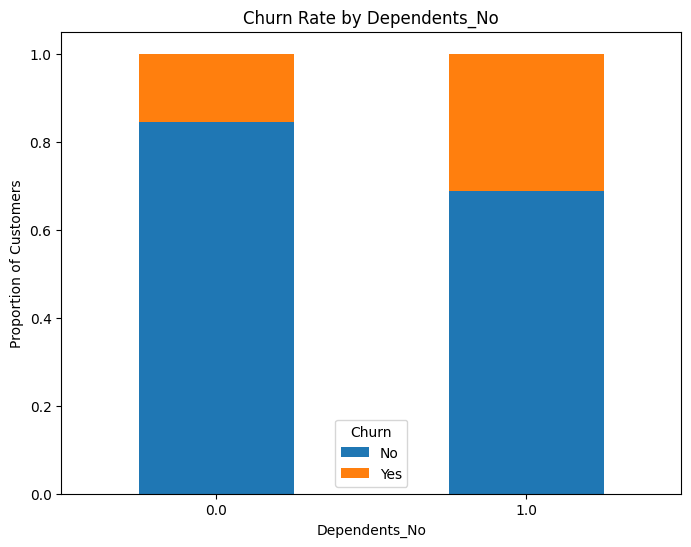

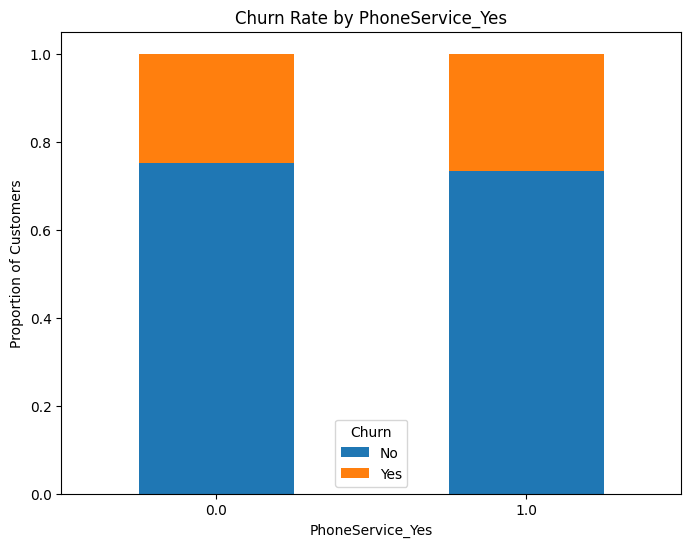

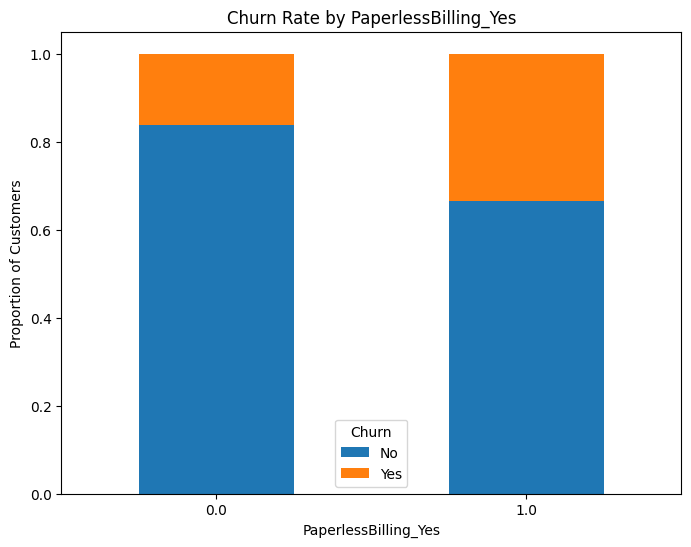

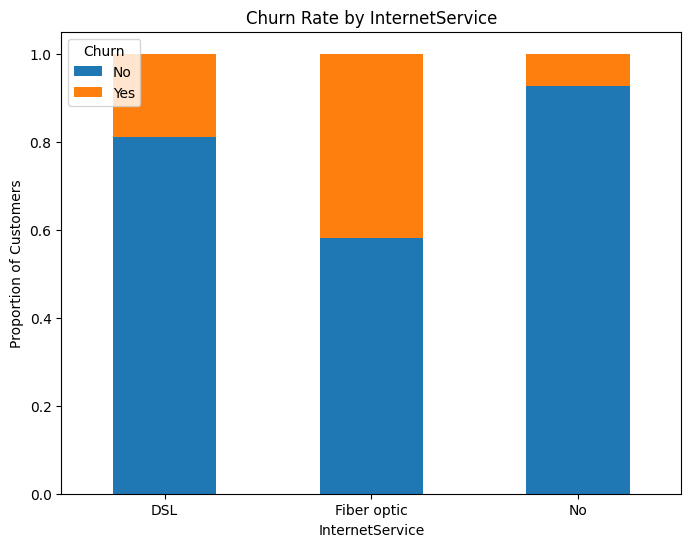

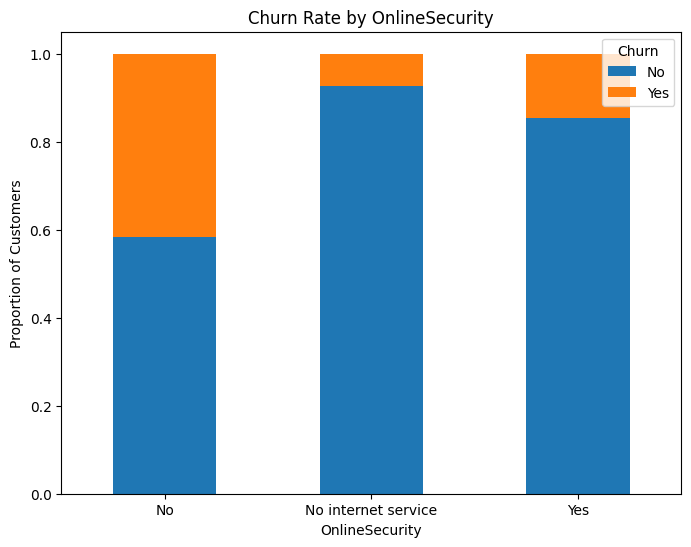

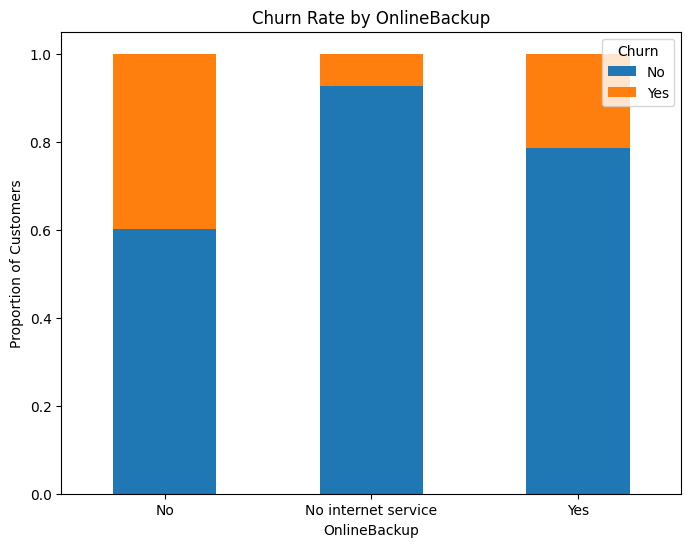

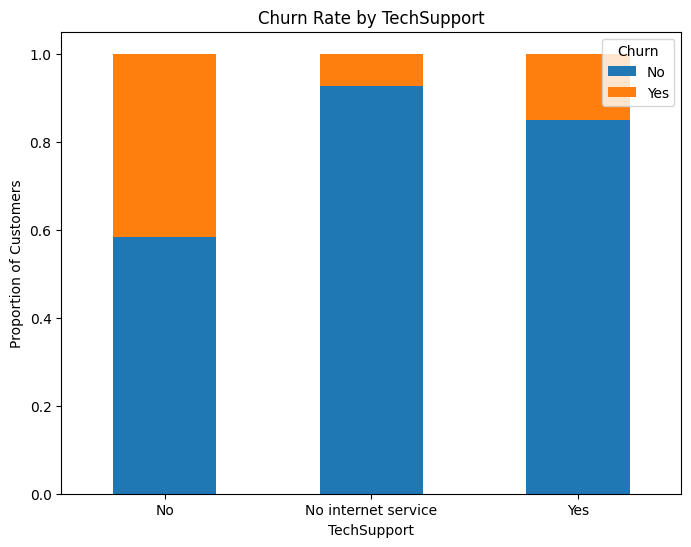

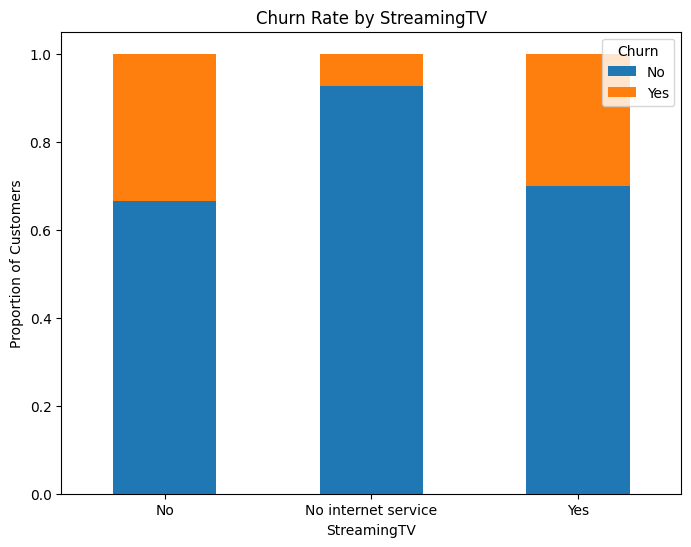

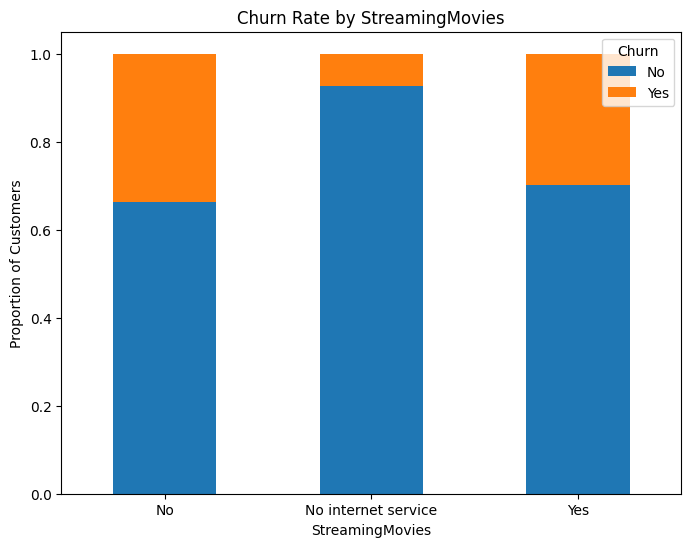

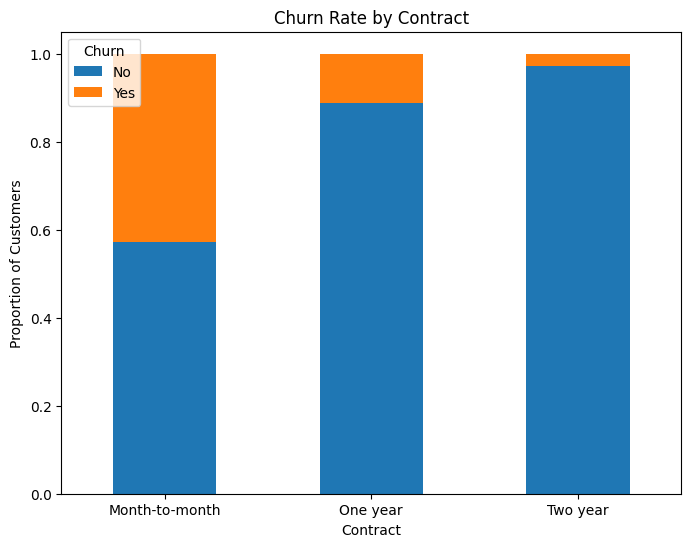

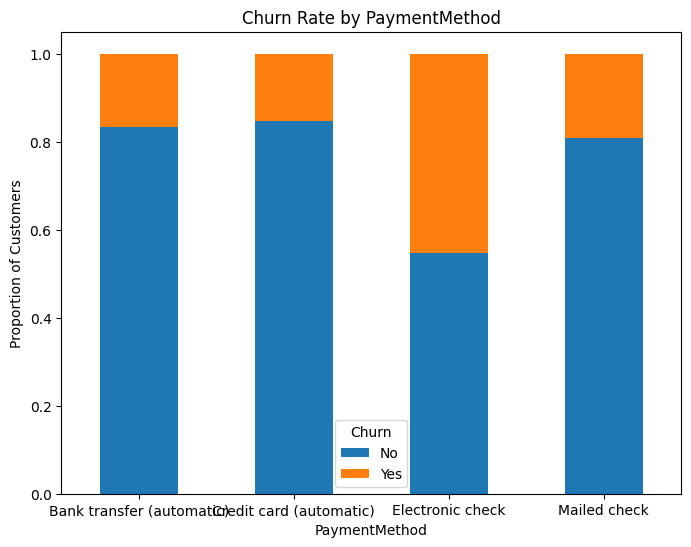

In [91]:

def plot_churn_by_category(df, category_col):
    
    category_churn = df.groupby([category_col, 'Churn']).size().unstack()


    category_churn = category_churn.fillna(0)


    category_churn_proportions = category_churn.div(category_churn.sum(axis=1), axis=0)

    category_churn_proportions.plot(kind='bar', stacked=True, figsize=(8, 6))
    plt.title(f'Churn Rate by {category_col}')
    plt.xlabel(category_col)
    plt.ylabel('Proportion of Customers')
    plt.xticks(rotation=0)
    plt.legend(title='Churn')
    plt.show()


categorical_columns = ['gender_Male', 'Partner_Yes', 'Dependents_No', 'PhoneService_Yes', 'PaperlessBilling_Yes',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'StreamingTV',
                       'StreamingMovies', 'Contract', 'PaymentMethod']


for col in categorical_columns:
    if col in df_encoded.columns: 
      plot_churn_by_category(df_encoded, col)

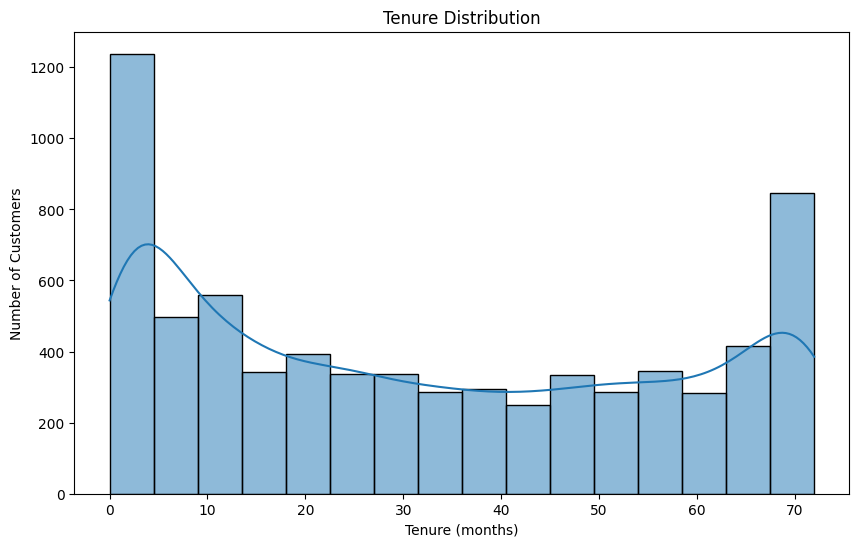

C:\Users\mailt\AppData\Local\Temp\ipykernel_6752\3700304913.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tenure = df_encoded.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack() * 100


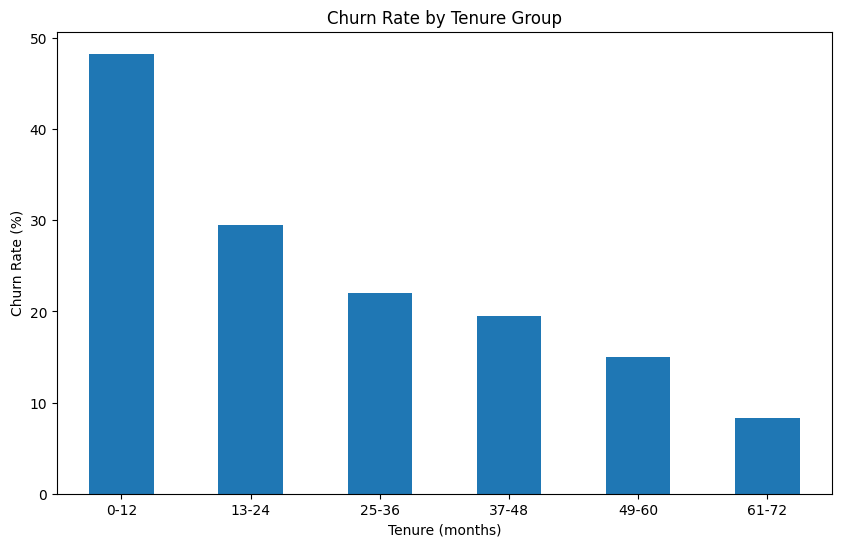

In [92]:
plt.figure(figsize=(10, 6))
sns.histplot(df_encoded['tenure'], kde=True) 
plt.title('Tenure Distribution')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')
plt.show()



tenure_bins = [0, 12, 24, 36, 48, 60, 72]  
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72']


df_encoded['tenure_group'] = pd.cut(df_encoded['tenure'], bins=tenure_bins, labels=labels, right=False)



churn_by_tenure = df_encoded.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack() * 100
churn_by_tenure = churn_by_tenure.rename(columns={'Yes': 'Churn Rate'})


plt.figure(figsize=(10, 6))
churn_by_tenure['Churn Rate'].plot(kind='bar')
plt.title('Churn Rate by Tenure Group')
plt.xlabel('Tenure (months)')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=0)
plt.show()

Churn by Contract Type and Payment Method


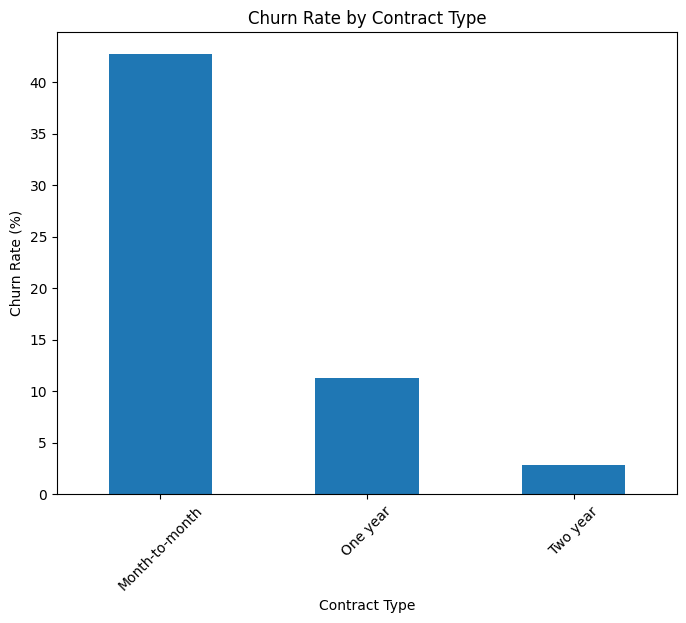

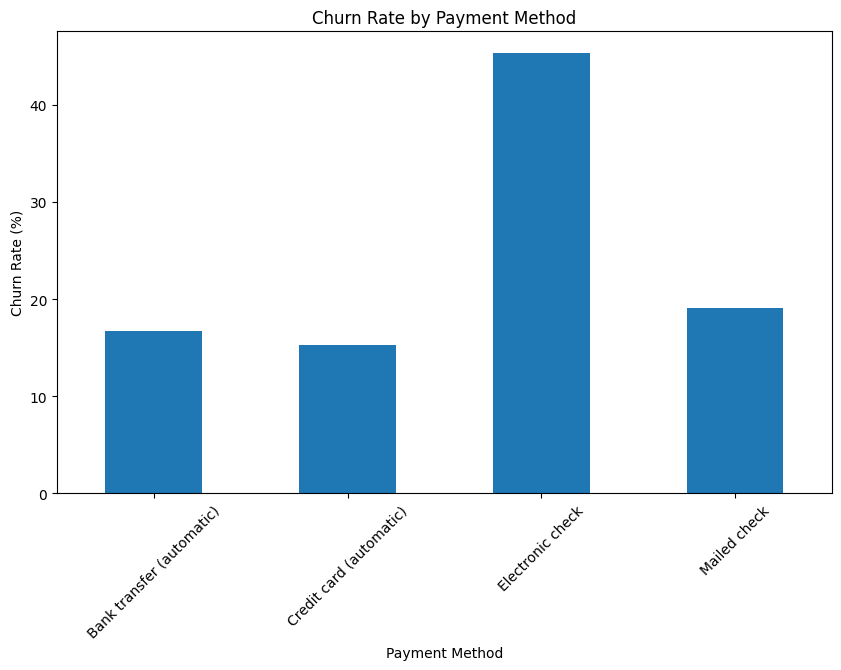

In [93]:

contract_churn = df_encoded.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100
contract_churn = contract_churn.rename(columns={'Yes': 'Churn Rate'})


plt.figure(figsize=(8, 6))
contract_churn['Churn Rate'].plot(kind='bar')
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.show()



payment_churn = df_encoded.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack() * 100
payment_churn = payment_churn.rename(columns={'Yes': 'Churn Rate'})

plt.figure(figsize=(10, 6))
payment_churn['Churn Rate'].plot(kind='bar')
plt.title('Churn Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.show()

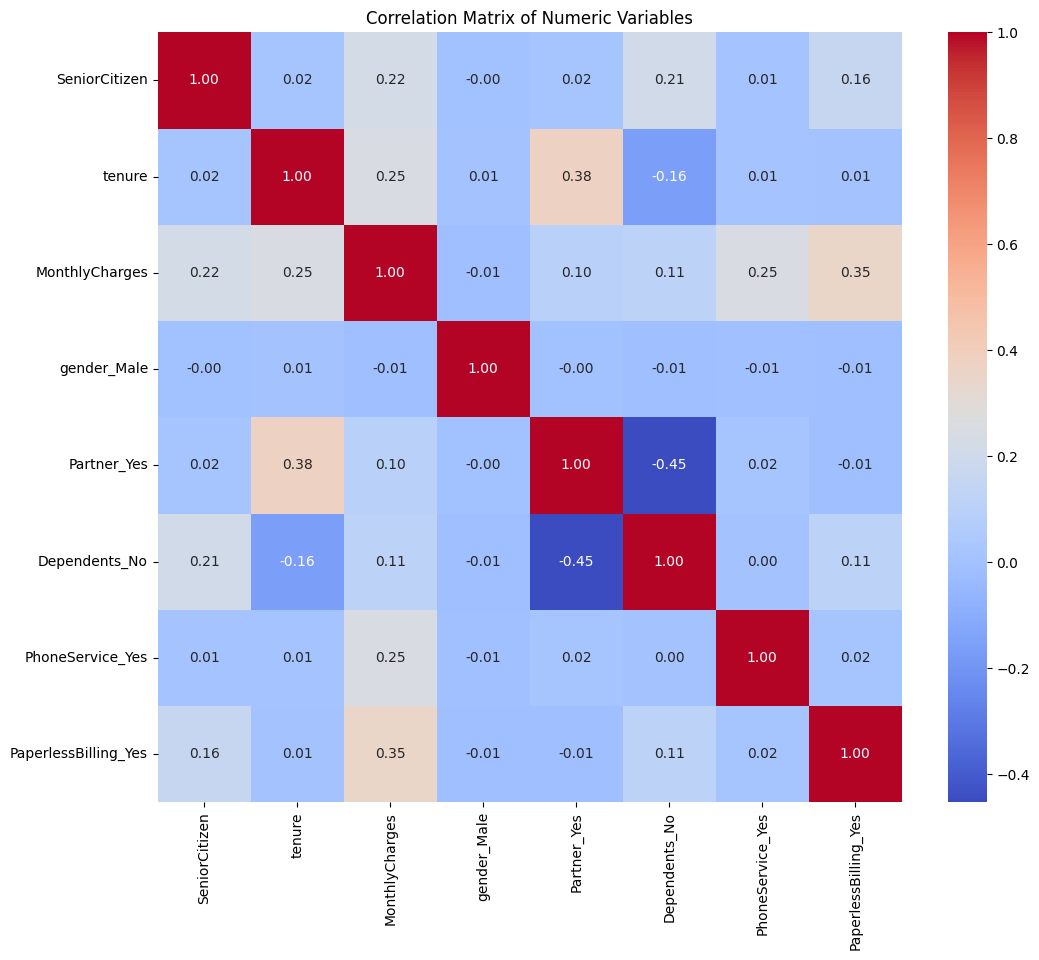

In [94]:

numeric_cols = df_encoded.select_dtypes(include=np.number).drop(columns=['customerID'], errors='ignore').columns


correlation_matrix = df_encoded[numeric_cols].corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

Chi-Square Test for Categorical Variables


In [95]:
def perform_chi2_test(df, col1, col2):

    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for {col1} vs. {col2}:")
    print("Chi2 statistic:", chi2)
    print("P-value:", p)
    print("Degrees of freedom:", dof)
    print("Expected frequencies:\n", expected)
    print("-" * 30)

categorical_cols = ['gender_Male', 'Partner_Yes', 'Dependents_No', 'PhoneService_Yes', 'PaperlessBilling_Yes',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'StreamingTV',
                       'StreamingMovies', 'Contract', 'PaymentMethod','tenure']

for col in categorical_cols:
    if col in df_encoded.columns:
        perform_chi2_test(df_encoded, col, 'Churn')

Chi-square test for gender_Male vs. Churn:
Chi2 statistic: 0.4840828822091383
P-value: 0.48657873605618596
Degrees of freedom: 1
Expected frequencies:
 [[2562.38989067  925.61010933]
 [2611.61010933  943.38989067]]
------------------------------
Chi-square test for Partner_Yes vs. Churn:
Chi2 statistic: 158.7333820309922
P-value: 2.1399113440759935e-36
Degrees of freedom: 1
Expected frequencies:
 [[2674.78830044  966.21169956]
 [2499.21169956  902.78830044]]
------------------------------
Chi-square test for Dependents_No vs. Churn:
Chi2 statistic: 189.1292494042347
P-value: 4.924921661215491e-43
Degrees of freedom: 1
Expected frequencies:
 [[1550.06957263  559.93042737]
 [3623.93042737 1309.06957263]]
------------------------------
Chi-square test for PhoneService_Yes vs. Churn:
Chi2 statistic: 0.9150329892546948
P-value: 0.3387825358066928
Degrees of freedom: 1
Expected frequencies:
 [[ 501.01774812  180.98225188]
 [4672.98225188 1688.01774812]]
------------------------------
Chi-squ

In [96]:

def get_highly_dependent_attributes(df, target_column='Churn', alpha=0.05):

    highly_dependent_attributes = []
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns  # Get categorical cols

    for col in categorical_cols:
      if col != target_column:
        contingency_table = pd.crosstab(df[col], df[target_column])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        if p < alpha:
            highly_dependent_attributes.append(col)
    return highly_dependent_attributes


highly_dependent = get_highly_dependent_attributes(df_encoded)

print("Attributes highly dependent on Churn:")
for attribute in highly_dependent:
  print(attribute)

Attributes highly dependent on Churn:
InternetService
OnlineSecurity
OnlineBackup
TechSupport
StreamingTV
StreamingMovies
Contract
PaymentMethod
tenure_group


In [97]:

contract_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)


encoded_contract = contract_encoder.fit_transform(df_encoded[['Contract']])


contract_feature_names = contract_encoder.get_feature_names_out(['Contract'])

encoded_contract_df = pd.DataFrame(encoded_contract, columns=contract_feature_names)

df_encoded = df_encoded.drop('Contract', axis=1)


df_encoded = pd.concat([df_encoded, encoded_contract_df], axis=1)

print(df_encoded.head())

   customerID  SeniorCitizen  tenure InternetService OnlineSecurity  \
0  7590-VHVEG              0       1             DSL             No   
1  5575-GNVDE              0      34             DSL            Yes   
2  3668-QPYBK              0       2             DSL            Yes   
3  7795-CFOCW              0      45             DSL            Yes   
4  9237-HQITU              0       2     Fiber optic             No   

  OnlineBackup TechSupport StreamingTV StreamingMovies  \
0          Yes          No          No              No   
1           No          No          No              No   
2          Yes          No          No              No   
3           No         Yes          No              No   
4           No          No          No              No   

               PaymentMethod  ...  Churn gender_Male Partner_Yes  \
0           Electronic check  ...     No         0.0         1.0   
1               Mailed check  ...     No         1.0         0.0   
2               Mail

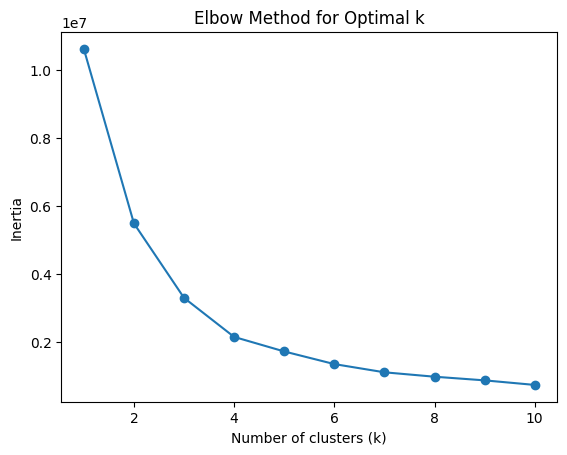

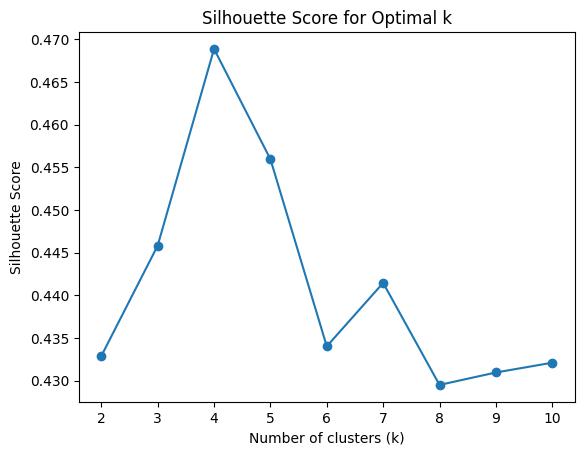

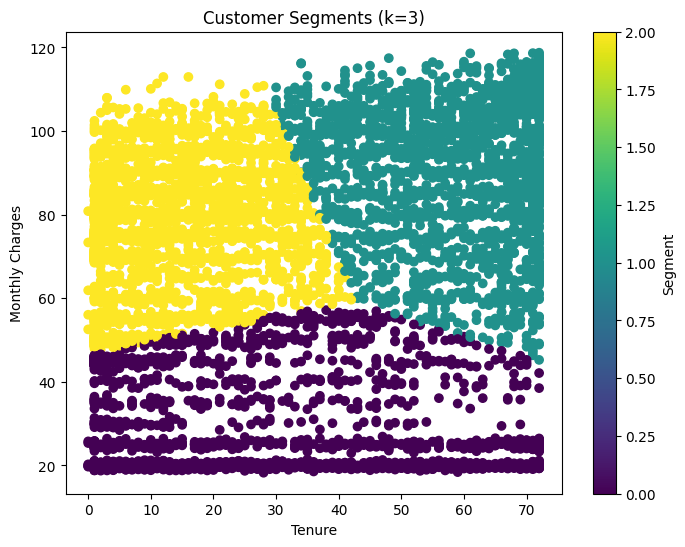

In [98]:
features = ['tenure', 'MonthlyCharges', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year']
X_segment = df_encoded[features]


inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_segment)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()


silhouette_scores = []
for k in range(2, 11): 
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_segment)
    score = silhouette_score(X_segment, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


optimal_k = 3 
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_encoded['Segment'] = kmeans.fit_predict(X_segment)

plt.figure(figsize=(8, 6))
plt.scatter(df_encoded['tenure'], df_encoded['MonthlyCharges'], c=df_encoded['Segment'], cmap='viridis')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.title(f'Customer Segments (k={optimal_k})')
plt.colorbar(label='Segment')
plt.show()

Churn           No  Churn Rate
Segment                       
0        85.006300   14.993700
1        84.441429   15.558571
2        52.345981   47.654019


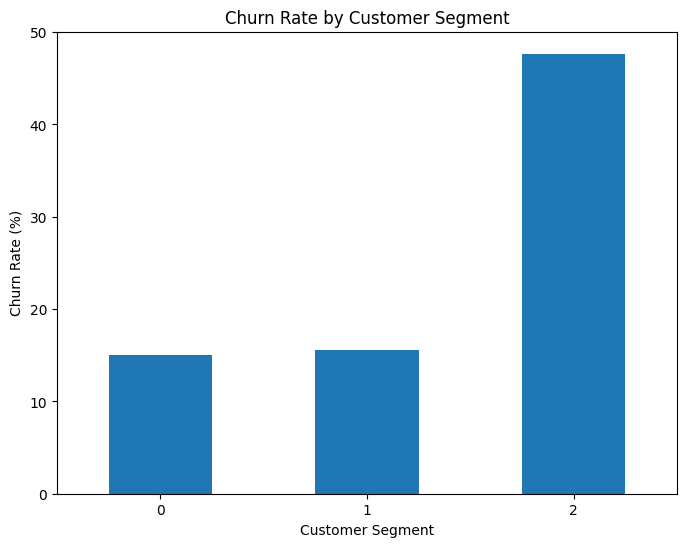

In [99]:
segment_churn = df_encoded.groupby('Segment')['Churn'].value_counts(normalize=True).unstack() * 100
segment_churn = segment_churn.rename(columns={'Yes': 'Churn Rate'})

print(segment_churn)


plt.figure(figsize=(8, 6))
segment_churn['Churn Rate'].plot(kind='bar')
plt.title('Churn Rate by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=0)
plt.show()

In [100]:
segment_churn = df_encoded.groupby('Segment')['Churn'].value_counts(normalize=True).unstack() * 100
segment_churn = segment_churn.rename(columns={'Yes': 'Churn Rate'})

print(segment_churn)



for segment in df_encoded['Segment'].unique():
  segment_data = df_encoded[df_encoded['Segment'] == segment]
  total_customers_segment = len(segment_data)
  churned_customers_segment = len(segment_data[segment_data['Churn'] == 'Yes'])

  churn_rate_segment = (churned_customers_segment / total_customers_segment) * 100

  print(f"Segment {segment}:")
  print(f"- Number of churned customers: {churned_customers_segment}")
  print(f"- Total customers in segment: {total_customers_segment}")
  print(f"- Churn Rate: {churn_rate_segment:.2f}%")
  print("-" * 20)

Churn           No  Churn Rate
Segment                       
0        85.006300   14.993700
1        84.441429   15.558571
2        52.345981   47.654019
Segment 0:
- Number of churned customers: 357
- Total customers in segment: 2381
- Churn Rate: 14.99%
--------------------
Segment 2:
- Number of churned customers: 1168
- Total customers in segment: 2451
- Churn Rate: 47.65%
--------------------
Segment 1:
- Number of churned customers: 344
- Total customers in segment: 2211
- Churn Rate: 15.56%
--------------------


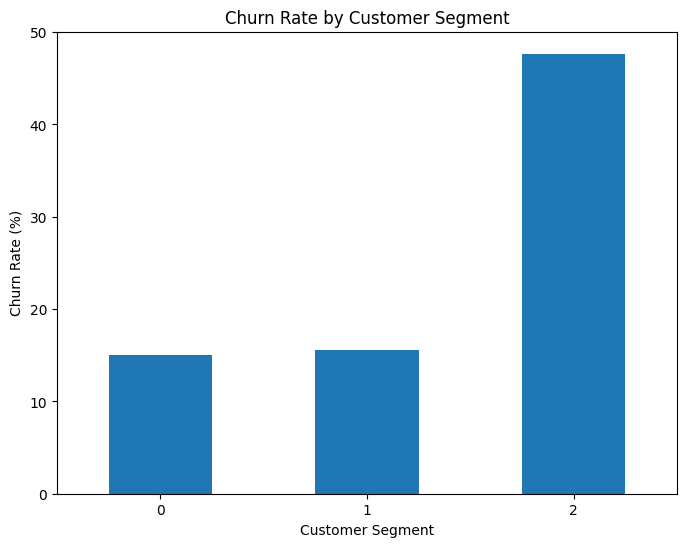


High Churn Segments (Churn Rate > 20%):
Segment 2: 47.65%

Analyzing Segment 2:
InternetService
Fiber optic    68.053856
DSL            31.946144
Name: proportion, dtype: float64


In [101]:

segment_churn = df_encoded.groupby('Segment')['Churn'].value_counts(normalize=True).unstack() * 100
segment_churn = segment_churn.rename(columns={'Yes': 'Churn Rate'})

plt.figure(figsize=(8, 6))
segment_churn['Churn Rate'].plot(kind='bar')
plt.title('Churn Rate by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=0) 
plt.show()

churn_threshold = 20 
high_churn_segments = segment_churn[segment_churn['Churn Rate'] > churn_threshold].index

print("\nHigh Churn Segments (Churn Rate > {}%):".format(churn_threshold))
for segment in high_churn_segments:
  print(f"Segment {segment}: {segment_churn['Churn Rate'][segment]:.2f}%")

for segment in high_churn_segments:
    segment_data = df_encoded[df_encoded['Segment'] == segment]
   
    print(f"\nAnalyzing Segment {segment}:")
    
    print(segment_data['InternetService'].value_counts(normalize=True) * 100) 


In [102]:
high_monthly_charges_threshold = 70 
high_value_customers = df_encoded[df_encoded['MonthlyCharges'] > high_monthly_charges_threshold]



high_churn_segments = [0, 2] 
at_risk_customers = high_value_customers[high_value_customers['Segment'].isin(high_churn_segments)]


print("High-value customers at risk of churning:")
print(at_risk_customers[['customerID', 'MonthlyCharges', 'Segment','Churn']]) 

High-value customers at risk of churning:
      customerID  MonthlyCharges  Segment Churn
4     9237-HQITU           70.70        2   Yes
5     9305-CDSKC           99.65        2   Yes
6     1452-KIOVK           89.10        2    No
8     7892-POOKP          104.80        2   Yes
14    5129-JLPIS          105.50        2    No
...          ...             ...      ...   ...
7027  0550-DCXLH           73.35        2    No
7032  6894-LFHLY           75.75        2   Yes
7035  8456-QDAVC           78.70        2    No
7038  6840-RESVB           84.80        2    No
7041  8361-LTMKD           74.40        2   Yes

[1711 rows x 4 columns]


In [103]:



high_monthly_charges_threshold = 70  
high_value_customers = df_encoded[df_encoded['MonthlyCharges'] > high_monthly_charges_threshold]



high_churn_segments = [0, 2]
at_risk_customers = high_value_customers[high_value_customers['Segment'].isin(high_churn_segments)]


print("High-value customers at risk of churning:")
at_risk_customers_info = at_risk_customers[['customerID', 'tenure', 'MonthlyCharges', 'Segment', 'Churn']]
at_risk_customers_info

High-value customers at risk of churning:


,customerID,tenure,MonthlyCharges,Segment,Churn
4,9237-HQITU,2,70.70,2,Yes
5,9305-CDSKC,8,99.65,2,Yes
6,1452-KIOVK,22,89.10,2,No
8,7892-POOKP,28,104.80,2,Yes
14,5129-JLPIS,25,105.50,2,No
...,...,...,...,...,...
7027,0550-DCXLH,13,73.35,2,No
7032,6894-LFHLY,1,75.75,2,Yes
7035,8456-QDAVC,19,78.70,2,No
7038,6840-RESVB,24,84.80,2,No


In [104]:


def develop_retention_strategies(at_risk_customers):
   

    retention_plans = []
    for index, customer in at_risk_customers.iterrows():
        customer_id = customer['customerID']
        tenure = customer['tenure']
        monthly_charges = customer['MonthlyCharges']
        segment = customer['Segment']

        plan = {
            'customerID': customer_id,
            'segment': segment,
            'strategy': ""
        }

        if segment == 0:
              plan['strategy'] = "Offer a promotional discount for the next 3 months. Provide personalized onboarding support."
        elif segment == 2:
            plan['strategy'] = "Offer bundled services, such as internet and TV packages, with a loyalty discount"
        else:
              plan['strategy'] = "Offer exclusive add-ons at discounted rate.  Upgrade plan with higher bandwidth and features."
        
      

        retention_plans.append(plan)
    return pd.DataFrame(retention_plans)


retention_strategies = develop_retention_strategies(at_risk_customers)
retention_strategies

,customerID,segment,strategy
0,9237-HQITU,2,"Offer bundled services, such as internet and T..."
1,9305-CDSKC,2,"Offer bundled services, such as internet and T..."
2,1452-KIOVK,2,"Offer bundled services, such as internet and T..."
3,7892-POOKP,2,"Offer bundled services, such as internet and T..."
4,5129-JLPIS,2,"Offer bundled services, such as internet and T..."
...,...,...,...
1706,0550-DCXLH,2,"Offer bundled services, such as internet and T..."
1707,6894-LFHLY,2,"Offer bundled services, such as internet and T..."
1708,8456-QDAVC,2,"Offer bundled services, such as internet and T..."
1709,6840-RESVB,2,"Offer bundled services, such as internet and T..."


In [105]:


def develop_retention_strategies(at_risk_customers):
   

    retention_plans = []
    for index, customer in at_risk_customers.iterrows():
        customer_id = customer['customerID']
        tenure = customer['tenure']
        monthly_charges = customer['MonthlyCharges']
        segment = customer['Segment']
       
        if customer['Contract_Month-to-month'] == 1:
            contract = 'Month-to-month'
        elif customer['Contract_One year'] == 1:
            contract = 'One year'
        elif customer['Contract_Two year'] == 1:
            contract = 'Two year'
        else:
            contract = 'Unknown' 

        plan = {
            'customerID': customer_id,
            'segment': segment,
            'contract': contract, 
            'strategy': ""
        }

        if segment == 0: 
            if tenure < 12:
                if contract == 'Month-to-month':  
                    plan['strategy'] = "Offer a promotional discount for the next 3 months. Provide personalized onboarding support and encourage a longer contract."
                else:
                    plan['strategy'] = "Offer a promotional discount and explore reasons for potential churn.  Provide personalized onboarding support."
            else: 
                plan['strategy'] = "Offer exclusive add-ons at a discounted rate. Upgrade plan with higher bandwidth and features.  Consider loyalty rewards."
        elif segment == 2:
            plan['strategy'] = "Offer bundled services, such as internet and TV packages, with a loyalty discount.  Provide exceptional customer service."
  

        retention_plans.append(plan)
    return pd.DataFrame(retention_plans)


retention_strategies = develop_retention_strategies(at_risk_customers)
retention_strategies

,customerID,segment,contract,strategy
0,9237-HQITU,2,Month-to-month,"Offer bundled services, such as internet and T..."
1,9305-CDSKC,2,Month-to-month,"Offer bundled services, such as internet and T..."
2,1452-KIOVK,2,Month-to-month,"Offer bundled services, such as internet and T..."
3,7892-POOKP,2,Month-to-month,"Offer bundled services, such as internet and T..."
4,5129-JLPIS,2,Month-to-month,"Offer bundled services, such as internet and T..."
...,...,...,...,...
1706,0550-DCXLH,2,Month-to-month,"Offer bundled services, such as internet and T..."
1707,6894-LFHLY,2,Month-to-month,"Offer bundled services, such as internet and T..."
1708,8456-QDAVC,2,Month-to-month,"Offer bundled services, such as internet and T..."
1709,6840-RESVB,2,One year,"Offer bundled services, such as internet and T..."


In [106]:



features = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaymentMethod', 'tenure_group','Contract_Month-to-month', 'Contract_One year', 'Contract_Two year']
X = df_encoded[features]
y = df_encoded['Churn']


X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)


y_pred = logreg_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8041163946061036
              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1036
         Yes       0.66      0.54      0.59       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409

[[933 103]
 [173 200]]


In [107]:




features = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 'PaymentMethod', 'tenure_group',
            'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year']
X = df_encoded[features]
y = df_encoded['Churn']


X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7814052519517388
              precision    recall  f1-score   support

          No       0.85      0.85      0.85      1036
         Yes       0.59      0.58      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409

[[885 151]
 [157 216]]


In [108]:

y_train_numeric = y_train.map({'No': 0, 'Yes': 1}) 
y_test_numeric = y_test.map({'No': 0, 'Yes': 1})
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train_numeric)



xgb_pred = xgb_model.predict(X_test)
print("XGBoost Results:")
print(f"Accuracy: {accuracy_score(y_test_numeric, xgb_pred)}") 
print(classification_report(y_test_numeric, xgb_pred))
print(confusion_matrix(y_test_numeric, xgb_pred))

XGBoost Results:
Accuracy: 0.794180269694819
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1036
           1       0.62      0.58      0.60       373

    accuracy                           0.79      1409
   macro avg       0.74      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409

[[903 133]
 [157 216]]


c:\Users\mailt\OneDrive\Desktop\data science proj\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:08:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


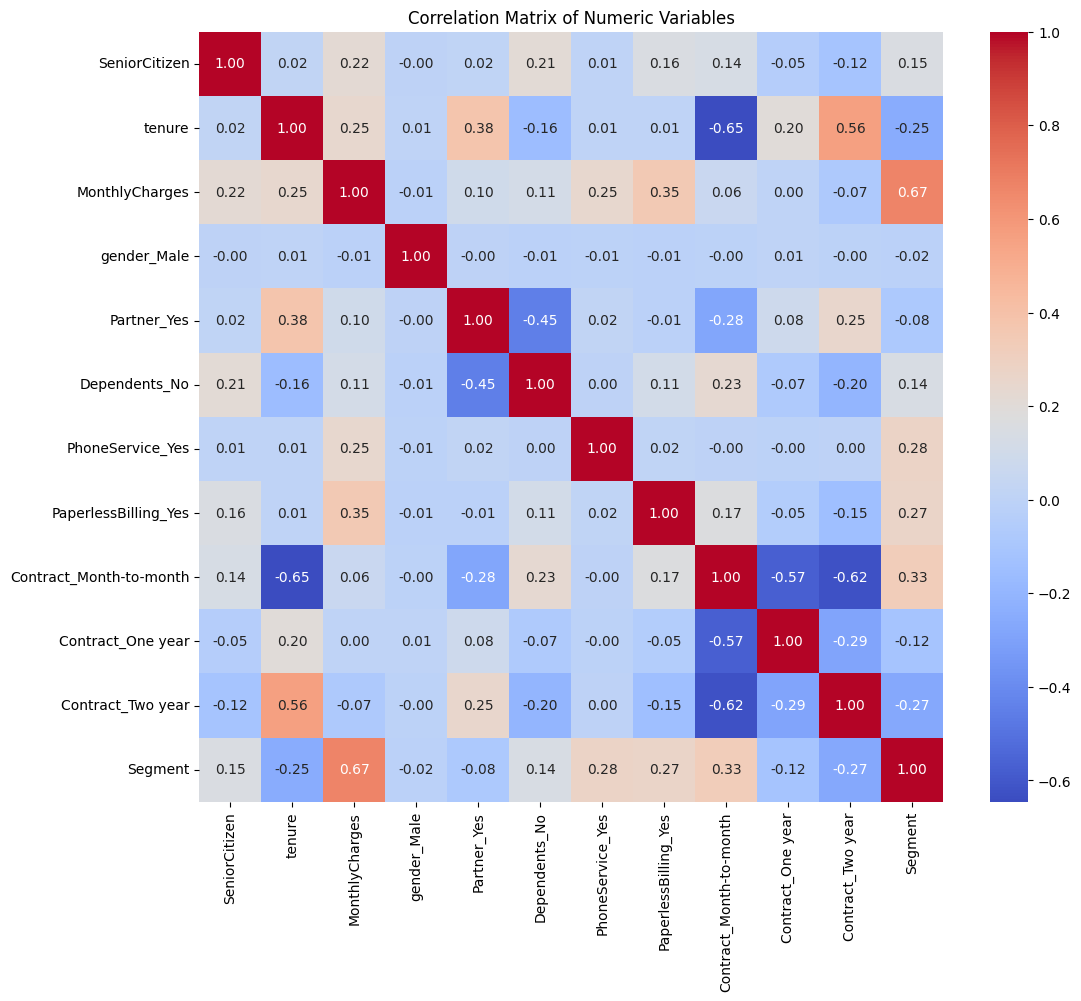

In [109]:

numeric_cols = df_encoded.select_dtypes(include=np.number).drop(columns=['customerID'], errors='ignore').columns


numeric_cols = [col for col in numeric_cols if col != 'tenure_group']

correlation_matrix = df_encoded[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

In [110]:


logreg = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=logreg, n_features_to_select=10)
rfe.fit(X_train, y_train)

print("RFE Selected Features:", X_train.columns[rfe.support_])



rfecv = RFECV(estimator=logreg, cv=5)
rfecv.fit(X_train, y_train)

print("RFECV Optimal Number of Features:", rfecv.n_features_)
print("RFECV Selected Features:", X_train.columns[rfecv.support_])


lasso_model = Lasso(alpha=0.01) 


y_train_numeric = y_train.map({'No': 0, 'Yes': 1})


lasso_model.fit(X_train, y_train_numeric)


lasso_importance = abs(lasso_model.coef_)


print("Lasso Feature Importances:")
for feature, importance in zip(X_train.columns, lasso_importance):
  print(f"{feature}: {importance}")



rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


rf_importance = rf_model.feature_importances_


print("Random Forest Feature Importances:")
for feature, importance in zip(X_train.columns, rf_importance):
    print(f"{feature}: {importance}")


rf_weights = rf_importance / np.sum(rf_importance)
lasso_weights = lasso_importance / np.sum(lasso_importance)
combined_importance = 0.6 * rf_weights + 0.4 * lasso_weights 

print("\nCombined Feature Importances (Random Forest and Lasso):")
for feature, importance in zip(X_train.columns, combined_importance):
    print(f"{feature}: {importance}")


RFE Selected Features: Index(['Contract_Month-to-month', 'Contract_Two year',
       'InternetService_Fiber optic', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'tenure_group_13-24',
       'tenure_group_25-36', 'tenure_group_37-48', 'tenure_group_49-60',
       'tenure_group_61-72'],
      dtype='object')
RFECV Optimal Number of Features: 15
RFECV Selected Features: Index(['Contract_Month-to-month', 'Contract_Two year',
       'InternetService_Fiber optic', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'PaymentMethod_Electronic check', 'tenure_group_13-24',
       'tenure_group_25-36', 'tenure_group_37-48', 'tenure_group_49-60',
       'tenure_group_61-72'],
      dtype='object')
Lasso Feature Importances:
Contract_Month-to-month: 0.2253818830146142
Contract_One year: 0.0
Contract_Two year: 0.010140799307427348


In [111]:
param_grid = {
    'C': [0.1, 1, 10], 
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear', 'saga']  
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters (Grid Search):", grid_search.best_params_)
print("Best Accuracy (Grid Search):", grid_search.best_score_)

best_logreg_model = grid_search.best_estimator_
y_pred_grid = best_logreg_model.predict(X_test)
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print(f"Test Accuracy (Grid Search): {accuracy_grid}")


param_dist = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [None, 10, 20],  
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4] 
}

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

print("\nBest Hyperparameters (Random Search):", random_search.best_params_)
print("Best Accuracy (Random Search):", random_search.best_score_)

best_rf_model = random_search.best_estimator_
y_pred_random = best_rf_model.predict(X_test)
accuracy_random = accuracy_score(y_test, y_pred_random)
print(f"Test Accuracy (Random Search): {accuracy_random}")

Best Hyperparameters (Grid Search): {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy (Grid Search): 0.7921539918770815
Test Accuracy (Grid Search): 0.8041163946061036

Best Hyperparameters (Random Search): {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
Best Accuracy (Random Search): 0.791088272516513
Test Accuracy (Random Search): 0.7998580553584103


In [112]:

lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)
print("\nLightGBM Results:")
print(f"Accuracy: {accuracy_score(y_test, lgb_pred)}")
print(classification_report(y_test, lgb_pred))
print(confusion_matrix(y_test, lgb_pred))



models = {
    'Logistic Regression': logreg_model,
    'Random Forest': rf_classifier,
    'XGBoost': xgb_model,
    'LightGBM': lgb_model
}

results = {}
for name, model in models.items():
    if name == 'XGBoost':
        pred = model.predict(X_test)
        results[name] = accuracy_score(y_test_numeric, pred)
    else:
        pred = model.predict(X_test)
        results[name] = accuracy_score(y_test, pred)

print("\nModel Comparison (Accuracy):")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")


best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000861 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 46
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418

LightGBM Results:
Accuracy: 0.8026969481902059
              precision    recall  f1-score   support

          No       0.85      0.89      0.87      1036
         Yes       0.65      0.56      0.60       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80    